# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Notasonda Soni Putra
- Email: soniputra42016@gmail.com
- Id Dicoding: soni_putra_vkp3

## Menentukan Pertanyaan Bisnis

- Geografis State pembeli terbanyak berada dimana? (Membuat Prediksi)
- Berapa presentase tingkat kepuasan pembeli dalam total penjualan? (Mengidentifikasi Tema)

## Menyaipkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Gathering Data Customer

In [2]:
df_costumer = pd.read_csv("Datasets/E_Commerce_Public_Dataset/customers_dataset.csv")

In [3]:
df_costumer.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Gathering Data Order Review

In [4]:
df_order = pd.read_csv("Datasets/E_Commerce_Public_Dataset/order_reviews_dataset.csv")

In [5]:
df_order.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

#### Assessing Data Customer

In [6]:
df_costumer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Dari hasil assessing data customer diketahui bahwa tabel customer tidak memiliki nilai yang missing value, sehingga tidak perlu dilakukan data cleaning.

#### Assessing Data Order Review

In [7]:
df_order.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dari hasil assessing data order review diketahui total missing value berada di kolom "review_comment_title" dan "review_comment_message", sehingga dari hasil tersebut maka akan dilakukan proses cleaning data.

### Cleaning Data

In [8]:
df_orderBaru = df_order.drop(['review_comment_title', 'review_comment_message'], axis=1)
df_orderBaru.head(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


Dikarenakan jumlah missing value yang berada di kolom "review_comment_title" dan "review_comment_message" terlalu banyak, dan kolom tersebut tidak terlalu berpengaruh dalam proses analisis ini maka langkah untuk melakukan proses cleaning data ialah melakukan penghapusan kolom tersebut.

## Exploratory Data Analysis (EDA)

### Describe Order

In [9]:
df_orderBaru["review_score"].describe(include="all")

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Berdasarkan hasil EDA pada DataFrame order review terkhusus pada kolom Review Score, diketahui bahwasaanya rata-rata penilaian dari pembeli terhadap barang yang dibeli berada di 4.09, dengan penilaian terendah berada di 1 dan penilaian tertinggi berada di 5.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Geografis State pembeli terbanyak berada dimana?

#### Explanatory Analysis

In [10]:
geog_state = df_costumer["customer_state"].value_counts(ascending=True)
geog_state

RR       46
AP       68
AC       81
AM      148
RO      253
TO      280
SE      350
AL      413
RN      485
PI      495
PB      536
MS      715
MA      747
MT      907
PA      975
CE     1336
PE     1652
GO     2020
ES     2033
DF     2140
BA     3380
SC     3637
PR     5045
RS     5466
MG    11635
RJ    12852
SP    41746
Name: customer_state, dtype: int64

#### Visualization Analysis

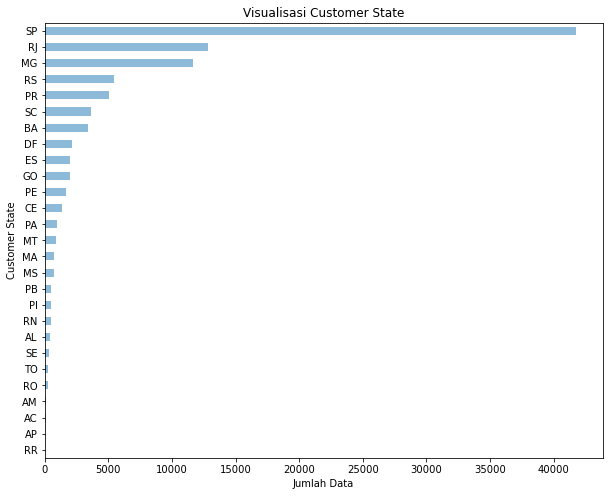

In [11]:
geog_state.plot(kind="barh", figsize=(10,8), alpha=0.5)
plt.xlabel("Jumlah Data")
plt.ylabel("Customer State")
plt.title("Visualisasi Customer State")
plt.show()

### Pertanyaan 2: Berapa presentase tingkat kepuasan pembeli dalam total penjualan?

#### Explanatory Analysis

In [12]:
order_rev = df_orderBaru["review_score"].value_counts(ascending=True)
order_rev

2     3151
3     8179
1    11424
4    19142
5    57328
Name: review_score, dtype: int64

#### Visualization Analysis

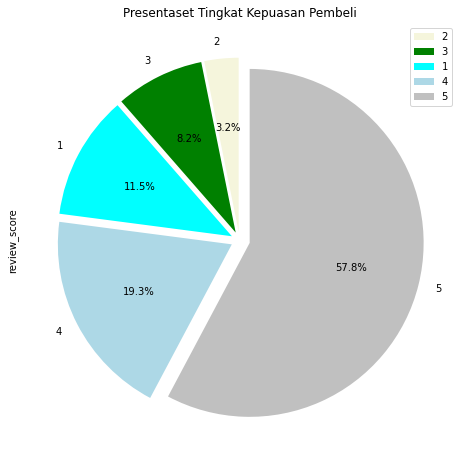

In [13]:
pie_color=["beige","green","cyan","lightblue","silver"]
explodes = [0.05, 0.05, 0.05, 0.05, 0.06]
order_rev.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", colors=pie_color, explode = explodes)
plt.title('Presentaset Tingkat Kepuasan Pembeli')
plt.legend(labels=order_rev.index)

## Conclusion

- Conclution pertanyaan 1

Dari hasil analisa dan visualisasi hasil didapatkan kesimpulan yaitu, pembeli terbanyak di dalam e-commerce berasal dari state SP. Yang dimana hasil dari analisa tersebut dapat digunakan oleh pihak e-commerce untuk melakukan bahan evaluasi diantaranya sebagai berikut:
1. Dapat digunakan sebagai bahan untuk memberikan diskon atau sejenisnya berdasarkan zonasi,
2. Melakukan kegiatan periklanan atau mengadakan event-event di state customer yang terendah dalam hal ini state RR

- conclution pertanyaan 2

Dari hasil analisa dan visualisasi hasil pada pertanyaan ke-2 diketahui bahwasannya, tingkat kepuasan pelanggan dalam melakukan pemesanan yang memberikan bintang 5 sebanyak 57.8% dan yang memberikan bintang 1 sebanyak 11.5%. Sehingga dari analisa tersebut didapatkan sebuah hasil yaitu jumlah costumer yang puas akan barang yang dipesan sangat baik berada di 50% lebih namun diperhatikan juga bahwasannya costumer yang tidak puas dengan barang yang dipesan berada di 11.5% sehingga perlu dilakukannya evaluasi dari respon para pembeli.